## 1. 一般线性回归
为了对比, 回顾一下前面学过的kNN回归算法的结果:

In [3]:
# 导入模块:
import mglearn 
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression 

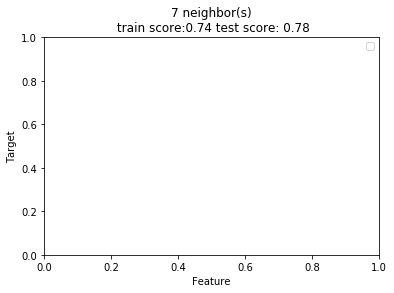

In [16]:
#生成数据集: 只有一个特征的数据集
X, y = mglearn.datasets.make_wave(n_samples=40)  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

#如果数据仅有一个特征,利用array.reshape(-1, 1)改变数组形状;
#如果数据中仅包含一个样本,则可利用array.reshape(1, -1)改变数组形状.
line = np.linspace(-3,3, 1000).reshape(-1,1)
n_neighbors = 7 # 可改变k值:1,5,10

# 训练回归模型
reg = KNeighborsRegressor(n_neighbors=n_neighbors)
reg.fit(X_train,y_train)

# 作图: 包括回归曲线, 训练集,测试集 共三行代码
# ==Your code

# 图形标识
plt.title("{} neighbor(s)\n train score:{:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train,y_train),                                                                        reg.score(X_test,y_test)))
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["Predictions", "Training data/target", "Test data/target"])

## 1. 简单线性回归

#### (1) 对于只有一个特征的数据集
线性回归模型

$\hat y = \beta_1 * x_1 + \beta_0$,

$\beta_1$是斜率, $\beta_0$是y轴上的截距.

$\hat y$称为response, 是模型的\____.



#### (2) 对于只有$p+1$个特征的数据集
线性回归模型

$\hat y = \beta_0* x_0+ ...+ \beta_p * x_n$ (总是设置 $x_0 = 1$)

我们也可把$\hat y$看作是输入特征$x_0,x_1,...,x_n$的带权重的求和.($n$ : 特征的数目.)

我们可将系数记为一个矢量$\bf \beta$
$${\bf \beta} = \left(
\begin{matrix}
 \beta_0    \\
 \beta_1 \\
 \vdots \\
 \beta_n \\
\end{matrix} 
\right),
$$
其中,${\bf\beta}_0, {\bf\beta}_1,...,{\bf\beta}_n$是模型的参数.


可将**一个样本**的特征记为一个矢量$\bf x$ 
$${\bf x} = \left(
\begin{matrix}
 1  \\
 x_1 \\
 \vdots \\
 x_n \\
\end{matrix} 
\right),
$$
其中,$x_1$表示第1个特征, ...,$n$表示第$n$个特征.

所以, 我们可以写出线性回归模型的矢量形式:
$$\hat y = {\bf\beta}^T \cdot {\bf x},$$

其中,${\bf\beta}^T$是$\bf\beta$的转置 (所以是一个**行矢量**), $\hat y$ 是 ${\bf\beta}^T$ 和 ${\bf x}$的点积.

#### (3) 代价函数(cost function) 
又称损失函数(loss funtion).

实践中,往往计算均方差损失函数(MSE lost function), 从而获得参数${\bf\beta}$的值(训练出模型).  (对比: 前面学过RMSE, 但我们计算MSE,而不是RMSE.)

$$\text{MSE}({\bf\beta}) = \frac{1}{m}\sum_{i=1}^m({\bf\beta}^T \cdot {\bf x}^{(i)} -y^{(i)})^2.$$

解出上面这个方程,就可以得到$\bf\beta$的值,也就是**线性模型**. 其解为:

$$\hat{\bf \beta} = ({\bf X}^T\cdot {\bf X})^{-1}\cdot {\bf X}^T \cdot {\bf y},$$

$\hat{\bf \beta}$就是使得损失函数最小的参数组成的矢量;

$\bf X$是$m\times n$矩阵, $\bf\beta$是$n\times 1$矩阵(矢量);

${\bf y}$是目标值$y^{(1), ..., y^{(m)}}$构成的矢量, $n\times 1$矩阵.

我们称这个方程为**正则方程** (Normal Equation). 

注意:用正则方程来计算$\bf\beta$的时间复杂度为$O(n^3)$, 当特征数目$n$很大时,不要用这种方法来求$\bf\beta$.

In [15]:
#linear_regression.py  

# 导入线性回归模型
from sklearn.linear_model import LinearRegression

#生成数据集: 只有一个特征的数据集
X, y = mglearn.datasets.make_wave(n_samples=40)  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  
# print(X.shape)

# 训练出线性回归模型
#==Your code


# 计算并打印斜率和截距
# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute. 
# ==Your code

# 分别计算训练集和测试集的拟合优度, 保留三位小数 
#==Your code

# 作图:
# 对回归方程作图; 对训练集数据作图; 对测试集数据作图
# ==Your code

数据的很多细节都被丢掉了. **我们的目标(Target标签)是特征的( )** 是一个很强的假设,也就是说,是过于( )的模型! 

    1. coef_是Numpy数组；　intercept_是一个浮点型数.
    2. 训练集和测试集的准确度都不高.这说明我们的方法是 ()拟合的，而不是()拟合的.
    3. 但是对于具有更多特征的数据集，线性模型是很有用的！这种情况下，更多的情况是过拟合出现，而非欠拟合.(例)

当你的特征数目($p+1$)大于你的数据点的数目(样本个数)时,目标$y$往往可以用线性模型很好地预测出来. 

下面就是一个例子.这个例子中,特征数目为(),样本数目(). 前者( )后者.

In [25]:
#linear_regression2.py  

#生成数据集
X, y = mglearn.datasets.load_extended_boston()    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
#查看训练集的形状
#==Your code

# ( )
# your code
  
#计算并打印( )
# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute.  
print("lr.coef_:{}".format(lr.coef_))  
print("lr.intercept_:{}".format(lr.intercept_))  

# 分别计算训练集和测试集的拟合优度, 保留三位小数 
print("Traing set score: {:.2f}".format(lr.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lr.score(X_test,y_test))) 

lr.coef_:[-1.28951445e+02 -1.34428510e+00 -8.67318455e+01  7.77632358e+00
 -3.99171323e+01  2.70293830e+01  5.47208851e+01 -6.56642421e+01
  5.09798804e+01  2.65026504e+01 -1.30928694e+01  4.74536524e+01
  6.03409502e+01  5.10356536e+01  1.78502944e+03  2.28227572e+02
  4.20670688e+02 -8.17911638e+01  2.68870969e+02 -1.03756878e+02
 -3.71719154e+02 -4.05628354e+02  3.86397260e+02  1.60061974e+00
  2.40250959e+01  6.01420724e+01 -5.58474352e+00 -1.21070403e+01
 -1.27840747e+01 -2.75737758e+01 -3.09926850e+00 -3.67752456e-01
 -4.97206841e+00 -1.83700135e+01  2.20802645e+01 -8.71607064e+00
  2.01513767e+01 -2.63241394e+01  2.12213309e+01  2.75196442e+00
  1.24451343e+01  4.12662428e+01  1.59151010e+01  5.68862279e+01
 -1.71528356e+01  1.68930772e+01  4.43661965e+00  1.96345586e+01
  3.33113995e+00  7.77632358e+00 -1.19634667e+01 -3.62913234e+01
  3.17167393e+00  3.67202215e+01 -3.69170261e+00 -8.75746266e+00
 -9.76048562e+00  9.49754359e+00 -2.02144606e+01  1.95083142e+01
  2.32452089e+01

分析:
1. 对于训练集，我们预测得( ) ，然而对于测试集上预测结果却( ).$R^2= ( ) $,比较() ,说明回归模型 ( )  ！
2. 上述差别说明：出现了 ( )！ 可以猜测: 对于特征数目很多的数据集(常称为**高维度数据集**),线性模型变得更有用,同时更容易出现( ).
3. 我们需要一个能让我们控制复杂度的模型. 其中一个常见的选择是:岭回归.


## 2. 岭回归(Ridge regression)

Ridge回归也是一种线性回归. 这个方法在OLS基础上，加入了额外的约束条件.

另外，我们也想让系数的绝对值尽可能的( )，即w的所有元素都应该接近0．

要求每个特征尽可能少地影响输出结果，也就是说，斜率要尽可能地( ),但是预测要尽可能准确！

加这个约束条件是**正则化**（regularization）的一个例子. 

正则化的含义就是：约束一个模型以避免过拟合.

岭回归用的正则化方法是L2正则化. 

岭回归的cost function (代价函数/损失函数)$J(\beta)$为:

$$J(\beta) = \text{MSE}(\beta) + \alpha \frac{1}{2}\sum_{i=1}^p \beta_i^2$$ 

(注意: $\beta_0$没有被正则化.)

求解$\bf \beta$的常用方法:

直接求解法. 公式表示为
$$\hat{\bf \beta} = ({\bf X}^T\cdot {\bf X} + \alpha {\bf I})^{-1}\cdot {\bf X}^T \cdot {\bf y} $$
 
梯度下降法(Gradient Descent). (类比前面学过的最小二乘法)

公式表达为:
$$\nabla_{\beta}\text{MSE}({\bf\beta}) 
= \left(
\begin{matrix}
 \nabla_{\beta_0}\text{MSE}({\bf\beta})  \\
 \nabla_{\beta_1}\text{MSE}({\bf\beta}) \\
 \vdots \\
 \nabla_{\beta_n}\text{MSE}({\bf\beta})\\
\end{matrix} 
\right)
= \frac{2}{m}{\bf X}^T \cdot ({\bf X}{\bf\beta} - {\bf y});
$$


$${\bf\beta}^{(\text{next step})} = {\bf\beta} - \eta\nabla_{\beta}\text{MSE}({\bf\beta}).$$


岭回归算法已经在
    sklearn.linear_mode.Ridge
中实现了.

In [26]:
from sklearn.linear_model import Ridge  
# 生成数据  
X, y = mglearn.datasets.load_extended_boston()   
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  

# __训练岭回归模型__
# ==Your code 
  

# __计算系数和截距__
# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute.   
print("ridge.coef_:{}".format(ridge.coef_))  
print("ridge.intercept_:{}".format(ridge.intercept_))  
  
# __分别计算训练集和测试集的拟合优度, 保留三位小数__
print("Traing set score: {:.3f}".format(ridge.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(ridge.score(X_test,y_test))) 

(506, 104)
ridge.coef_:[-1.70295812e+00 -1.21646220e+00 -2.26391270e+00  8.30845896e-01
 -8.58331367e-02  8.01116071e+00 -5.65999560e-03 -4.69520099e+00
  3.64886980e+00 -1.76903379e+00 -1.84601461e+00  2.32007300e+00
 -2.80633098e+00 -1.00796122e+00  5.43017764e-03 -1.05926024e+00
  1.58394405e+00 -1.66367827e+00 -1.33734211e+00 -1.24701369e+00
 -3.45676068e-01 -1.97789722e+00 -1.71426435e+00 -1.55777662e+00
 -1.22046160e+00 -1.18685106e+00  1.86974330e+00 -1.84090506e+00
  2.15362590e+00  3.33286814e-01  3.44159376e+00 -1.96103914e+00
 -4.39026619e-01 -1.86641840e-01  3.53642680e-01  6.52130195e-01
 -1.00510187e+00 -1.77202481e+00  3.42271888e+00  1.40820125e+00
  8.83430865e-01 -3.91620276e+00  2.18270833e+00 -3.72297245e+00
  1.10970075e+00  2.54657815e+00 -1.16437597e+00 -5.84765670e-01
 -1.92913457e+00  8.30845896e-01 -4.88404275e+00 -3.65276071e+00
  1.33691241e+00 -1.17583545e+00  2.82947313e+00  3.21863173e+00
  3.94714722e-01  1.80083969e+00 -2.30349790e+00 -1.68219494e+00
 -

分析:

1. 使用了岭回归以后,训练集的$R^2$值变()了,但测试集的$R^2$值更()了! 符合预期吗?. () 
2. 用一般线性回归,我们得到过拟合的模型.
3. 复杂性更低的模型在训练集上表现得更() ,但更具有( ). 
4. 普遍性是我们需求的,所以,我们应该选择(岭回归 or 一般线性回归).

In [14]:
# 岭回归 设置alpha=10  
X, y = mglearn.datasets.load_extended_boston()   
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
# 训练模型
#== YOur code

# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute.  
print("ridge.coef_:{}".format(ridge10.coef_))  
print("ridge.intercept_:{}".format(ridge10.intercept_))  

# 分别计算训练集和测试集的拟合优度, 保留三位小数
print("Traing set score: {:.3f}".format(ridge.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(ridge.score(X_test,y_test))) 

In [13]:
# 岭回归: 设置 alpha = 0.1 设置 alpha适当地小 模型更具普遍性)
  
X, y = mglearn.datasets.load_extended_boston()   
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  

# 训练模型  
# your code
print(X.shape)  

# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute.  
print("ridge.coef_:{}".format(ridge.coef_))  
print("ridge.intercept_:{}".format(ridge.intercept_))  

# 分别计算训练集和测试集的拟合优度, 保留三位小数
print("Traing set score: {:.3f}".format(ridge.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(ridge.score(X_test,y_test))) 


In [12]:
# 续
# 系数值与alpha的依赖关系
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")
print(X.shape) 

# LR
plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("coeficient index")
plt.ylabel("Coefficient value")
plt.hlines(0,0,len(lr.coef_))

plt.ylim(-25, 25)
plt.legend()

分析:
1. x轴: 模型的系数的() . 比如coef.index=0 对应第( )特征, coef.index=1对应第( )特征, ...

2. y轴: 模型的( ).

3. 岭回归: alpha=10对应的系数值取值大约在( )!

4. 岭回归: alpha=1, alpha=0.1对应的系数值取值的范围都要( ).

5. 无正则化的线性回归方法得到的系数值,范围更大还是更小? ( ) 是我们想要的结果吗? ( )

## 3. Lasso回归

Lasso回归(Least Absolute Shrinkage and Selection Operator regression),

另一种正规化线性回归方法. 

与岭回归一样,该法也是添加一个**正则项**到损失函数(cost function),使系数尽量接近0.

在Lasso回归模型中，我们用的是L1正规化: 

使用L1正则化后,一些最不重要的系数**精确地**等于0 (有些特征直接被忽略掉了).

这可以视为自动特征选择的的一种形式.

有些特征被( ),使得我们构建了一个更易解释的模型(稀疏模型),

能揭示数据最重要的特征.


Lasso回归的损失函数$J(\beta)$为:

$$J(\beta) = MSE(\beta) + \alpha \sum_{i=1}^p |\beta_i|$$ 

(注意: $\beta_0$没有被正则化.)

In [11]:
#lasso_regression.py  
from sklearn.linear_model import Lasso  

# 生成模型  
X, y = mglearn.datasets.load_extended_boston()   
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)  

# 训练Lasso回归模型
# Your code

print("lasso.coef_:{}".format(lasso.coef_))  
print("lasso.intercept_:{}".format(lasso.intercept_))  
  
print("Traing set score: {:.2f}".format(lasso.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))  

分析:
    1. Lasso回归对训练集和测试集的R^2分别为 (),() . 预测都做得(好,差). 说明出现了(欠拟合,还是过拟合)
    2. 共有( )特征,只用到了( )个特征. 
    3. Lasso()有正规化参数alpha. 其默认值alpha=1.0. alpha的值描述将系数推向０的力度. 

为了减少欠拟合的影响，我们增加另一个参数max_iter之值. mat_iter的值为运行时迭代的次数之最大值.

In [10]:
#lasso001_regression.py   
X, y = mglearn.datasets.load_extended_boston()  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
lasso01 = Lasso(alpha=0.01,max_iter=10000).fit(X_train, y_train)  
  
print("lasso.coef_:{}".format(lasso01.coef_))  
print("lasso.intercept_:{}".format(lasso01.intercept_))  
print("No.of features used:{}".format(np.sum(lasso001.coef_!=0)))  

print("Traing set score: {:.2f}".format(lasso01.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lasso01.score(X_test,y_test)))  

分析:
    1. 更(高,低)的alpha值可使我们拟合出更复杂的模型,从而在训练集和测试集上都有(更好,更差)的预测性能.
    2. 此例中,alpha=0.01, max_iter=100000. 相对默认值,训练集和测试集的拟合优度都有没有提升.(有,没有 )
    3. 相比岭回归,这个Lasso回归模型的拟合优度更高,而所用的特征数只使105个特征中的(  )个.所以Lasso回归所得的模型比岭回归模型更(简单, 复杂),更易解释.

alpha过小,显然会导致( )现象!

In [ ]:
#lasso0001_regression.py 
# 训练Lasso回归模型,lasso00001,设置alpha=0.0001, max_iter=10000
  
X, y = mglearn.datasets.load_extended_boston()  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
# 训练模型
# your code
  
print("lasso.coef_:{}".format(lasso00001.coef_))  
print("lasso.intercept_:{}".format(lasso00001.intercept_))  
print("No.of features used:{}".format(np.sum(lasso00001.coef_!=0)))  

print("Traing set score: {:.2f}".format(lasso00001.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test))) 

In [ ]:
# 续: 作出不同模型的系数的图
# 系数值与Lasso alpha的依赖关系
plt.plot(lasso.coef_, "s", label="Lass alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1") 
plt.xlabel("coeficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))

对系数的特征作分析:
    1. 对alpha=1, ()
    
    2. 减小alpha到0.01, ( )
    
    3. 减小alpha到0.0001, ( )
    
   
    
    4. 岭回归和Lasso回归的预测能力对比: ( )



## 4. 线性分类模型

线性模型也可用于分类问题. 预测值为如下公式：

$$\hat y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n $$

这公式与一般线性回归非常相似.

唯一不同的是,我们添加了线性分类模型的阈值0. 

线性分类模型的规则如下：
 
如果 $\hat y < 0$, 预测其类为　-1;

如果 $\hat y > 0$, 预测其类为　1.


对线性回归模型,输出是特征的线性函数:

一条直线,一个平面,或者一个超平面(高维空间中).

|特征数 | 预测值$\hat y$作为特征x的函数|
|--------|-------------- |
|1   | 2维空间中的一条直线 |
|2   | 3维空间中的一个平面 |
|3   | 4维空间中的一个超平面 |
|4   | 5维空间中的一个超平面
|5   | ... |

二元分类器就是用直线，平面或超平面将两类分开的分类器.

这里的直线,平面,或超平面就是分类器的**决策边界**.

目前存在很多机器学习算法来构造线性分类器. 

它们的不同点只有如下两点:

1. 判定斜率和截距拟合数据的好坏程度的方法. 

(数据拟合得很好的标准)

2. 是否用正则化方法,用了什么正则化方法.

最常见的两种线性分类器算法是: 

逻辑回归(logistic regression)和

支持向量机(linear support vector machines, linear SVMs).

它们已经分别在
    
    linear_model.LogisticRegression
    svm.LinearSVC

中实现了. SVC代表support vector classifier(支持向量分类器).

In [7]:
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import LinearSVC  
import mglearn

X,y = mglearn.datasets.make_forge()  
fig, axes = plt.subplots(1, 2, figsize=(10,3))  

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):  
    clf = model.fit(X,y)  
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)  
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)  
    ax.set_title("{}".format(clf.__class__.__name__))  
    ax.set_xlabel("X0")  
    ax.set_ylabel("X1")  
axes[0].legend()  
plt.show()  

In [8]:
# 线性支持向量机分类器 
  
X,y = mglearn.datasets.make_forge()   
clf = LinearSVC().fit(X,y)  

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)  
mglearn.discrete_scatter(X[:, 0], X[:,1], y)  
plt.title("{}".format("LinearSVC"))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend()  
plt.show()

In [9]:
# 续:逻辑回归分类器  
X,y = mglearn.datasets.make_forge()   
clf = LogisticRegression().fit(X,y)  

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)  
mglearn.discrete_scatter(X[:, 0], X[:,1], y)  
plt.title("{}".format("LogisticRegression"))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend()  
plt.show()

分析: 

1. x轴是数据集的第一个特征,y轴是数据集的第二个特征

2. 我们分别用线性支持向量机分类器和逻辑回归分类器计算出了决策边界. 

它是一条直线.

3. 任何新数据如果落在上方,则归为1类; 如果落在下方,则归为0类.

4. 这两种分类器算出的决策边界相似. 注意: 都有两个数据点分类有误!

5. 两种分类算法都使用L2正则化方法.

在LogisticRegression和LinearSVC中,控制正则化的参数为C. 

C值越大,意味着更少的正则化.

In [ ]:
# 线性支持向量机分类器: C的取值,对决策边界的影响 
X,y = mglearn.datasets.make_forge()   
clf = LinearSVC(C=0.01).fit(X,y)  

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)  
mglearn.discrete_scatter(X[:, 0], X[:,1], y)  
plt.title("{}".format("LinearSVC"))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend()  
plt.show()

In [ ]:
# 线性支持向量机分类器: C=100,对决策边界的影响(2)   
  
X,y = mglearn.datasets.make_forge()   
clf = LinearSVC(C=100).fit(X,y)  

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)  
mglearn.discrete_scatter(X[:, 0], X[:,1], y)  
plt.title("{}".format("LinearSVC"))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend()  
plt.show()

分析:
    1. C越小,边界越( ) (对训练集的拟合优度可能小一些: 可能存在相对错误的分类. 用了正则化方法!是我们期待的结果)
    2. C越大,边界越( ).(对训练集的拟合优度可能非常高:出现(过拟合, 欠拟合).

与线性回归一样,对低维数据集来说, 线性分类器中的"线性"太苛刻了.当数据集的特征较多时,线性模型用来做分类器就非常强大!

In [ ]:
# 训练逻辑回归模型lorreg: 以含有多个特征的数据集为例: 默认C=1
from sklearn.datasets import  load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
                 random_state=42 )
# 训练模型
# your code

print("Traing set score: {:.3f}".format(logreg.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

分析: 
1. 默认值C=1 给出了很好的预测结果. 对训练集和测试集都很高.
2. 由于两者很接近,说明出现了:(欠拟合,过拟合)! 所以C 可以选(更大,更小)的值.

In [ ]:
# 训练逻辑回归模型lorreg100
# 以含有多个特征的数据集为例: 选C=100.即更复杂的模型.

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target,
                 random_state=42 )
# 训练模型
#==Your code

print(X_train.shape)
print("Traing set score: {:.3f}".format(logreg100.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

分析:
   1. C=100, 模型更复杂了.(正则化更少)
   2. 训练集和测试集的拟合优度都有没有提高 分别为(),()!
   
正则化更多(C取值更小)时,模型会怎么样?

In [ ]:
# 训练逻辑回归模型lorreg001
# 以含有多个特征的数据集为例: 选C=0.01.即更多正则化的模型.
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target,
                 random_state=42 )

# 训练模型
#==Your code

print(X_train.shape)
print("Traing set score: {:.3f}".format(logreg001.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

分析:
    1. C=0.01时,训练集和测试集的拟合优度(升高,降低)了!
    2. 当C过小时,得到一个(过拟合, 欠拟合)的模型(underfit model or overfit model).


下面考察C值的不同,对线性模型的系数值的影响.

In [ ]:
# 续: 作出不同模型的系数的图
# 系数值与C的依赖关系
plt.plot(logreg.coef_.T, "s", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(lasso001.coef_.T, "v", label="C=0.001")
print(logreg.coef_.shape)
print(logreg.coef_.T.shape)
print(cancer.data.shape)

plt.xlabel("coeficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend()

分析:
    
    logreg.coef_: 二维数组, 里面只有一个元素,该元素为一个一维数组.
    logreg.coef_.T: 形状为(30,1)的2维数组.
    

如果我们想要更简单的模型,可以选用L1正则化方法. 可设置penalty="l1".

In [ ]:
# 以含有多个特征的数据集为例: 选不同的C,附加参数penalty="l1".

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target,
                 random_state=42 )
lr_l1 = LogisticRegression(C=0.01,penalty="l1").fit(X_train, y_train)
print(X_train.shape)
print("Traing set score: {:.3f}".format(lr_l1.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(lr_l1.score(X_test,y_test)))

In [ ]:
# 以含有多个特征的数据集为例: 选不同的C,附加参数penalty="l1".
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target,
                 random_state=42 )
lr_l1 = LogisticRegression(C=1,penalty="l1").fit(X_train, y_train)
print(X_train.shape)
print("Traing set score: {:.3f}".format(lr_l1.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(lr_l1.score(X_test,y_test)))

In [ ]:
# 以含有多个特征的数据集为例: 选不同的C,附加参数penalty="l1".
from sklearn.datasets import  load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, 
                            stratify=cancer.target, random_state=42 )
lr_l1 = LogisticRegression(C=100,penalty="l1").fit(X_train, y_train)
print(X_train.shape)
print("Traing set score: {:.3f}".format(lr_l1.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(lr_l1.score(X_test,y_test)))